In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del data['Product_Category_2']
del data['Product_Category_3']
del data['Product_Category_1']

In [6]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,7969
...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,7172


In [7]:
for column in data.columns:
    print(column,":",data[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Purchase : 17959


# Gender analysis

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='Age'>

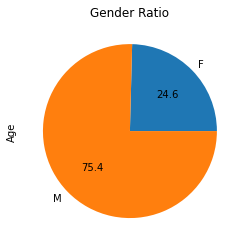

In [8]:
#analysis the gender

k=data.groupby('Gender').count()['Age']

k.plot(kind='pie' ,autopct='%.1f' , title='Gender Ratio')

<AxesSubplot:title={'center':'Total money spent by gender'}, ylabel='Purchase'>

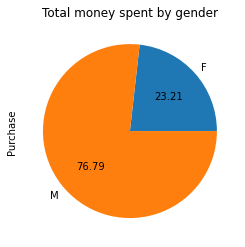

In [9]:
#how much money have spent by male and female
data.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.2f',title='Total money spent by gender')

<AxesSubplot:title={'center':'Average money spent by Gander'}, ylabel='Purchase'>

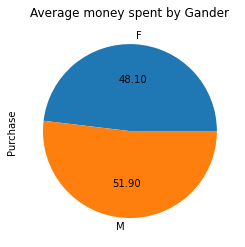

In [10]:
data.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct='%0.2f',title='Average money spent by Gander')

# Age and marital status anlysis

In [12]:
data.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

In [13]:
data[data['Age']=='0-17']['Product_ID'].nunique()

2300

In [14]:
#unique products to each age-group
age_prod = []

for i in data['Age'].unique():
    age_prod.append([i,data[data['Age']==i]['Product_ID'].nunique()])
    
df = pd.DataFrame(age_prod,columns=['Age','Product'])

<AxesSubplot:xlabel='Age'>

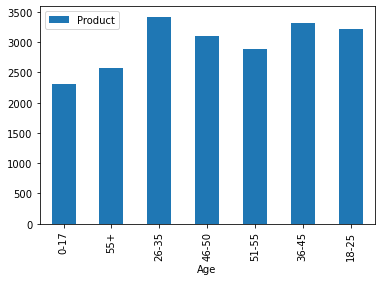

In [15]:
df.plot.bar(x='Age',y='Product')

In [16]:
#total money spent by age group

data.groupby('Age').sum()['Purchase']

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

<AxesSubplot:title={'center':'Distribution of purchase by age'}, xlabel='Age'>

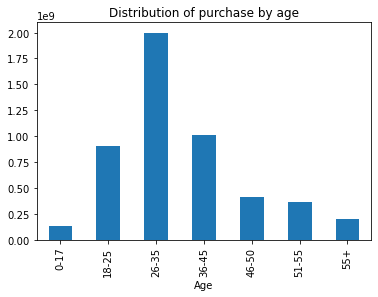

In [17]:
data.groupby('Age').sum()['Purchase'].plot(kind='bar',title='Distribution of purchase by age')

In [18]:
#average money spent by age

data.groupby('Age').mean()['Purchase']

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

<AxesSubplot:title={'center':'average money spent by age'}, xlabel='Age'>

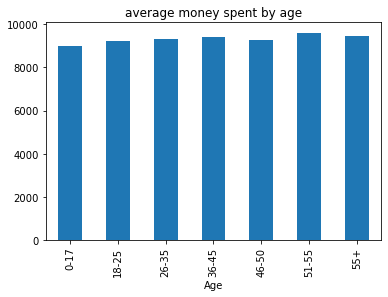

In [19]:
data.groupby('Age').mean()['Purchase'].plot(kind='bar',title='average money spent by age')

# Analysis of age and gender with purchase

<AxesSubplot:xlabel='Age', ylabel='count'>

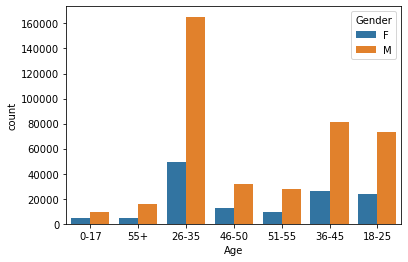

In [20]:
sns.countplot(data=data,x='Age',hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

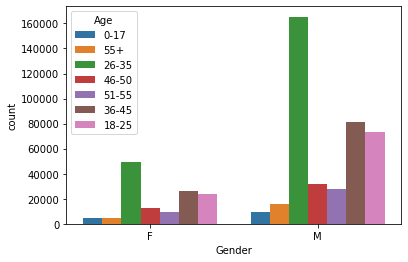

In [21]:
sns.countplot(data=data,x='Gender',hue='Age')

<AxesSubplot:xlabel='Gender', ylabel='count'>

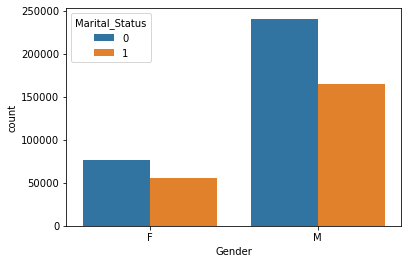

In [22]:
sns.countplot(data=data,x='Gender',hue='Marital_Status')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

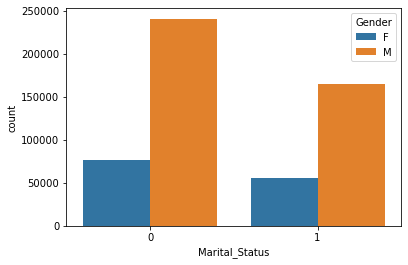

In [23]:
sns.countplot(data=data,x='Marital_Status',hue='Gender')

# City Analysis

<AxesSubplot:xlabel='City_Category', ylabel='count'>

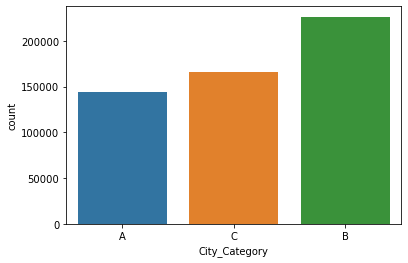

In [24]:
sns.countplot(data=data , x='City_Category')

<AxesSubplot:ylabel='None'>

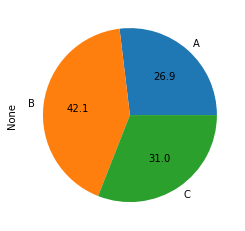

In [25]:
data.groupby('City_Category').size().plot(kind='pie',autopct='%0.1f')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

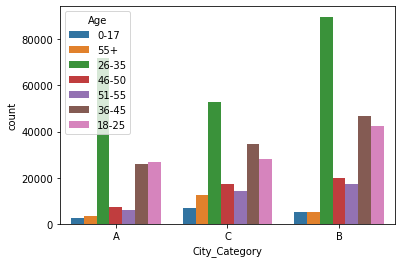

In [26]:
sns.countplot(data=data,x='City_Category',hue='Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

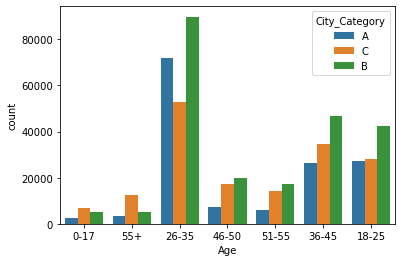

In [27]:
sns.countplot(data=data,x='Age',hue='City_Category')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

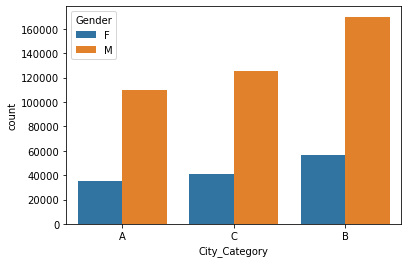

In [28]:
sns.countplot(data=data,x='City_Category',hue='Gender')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

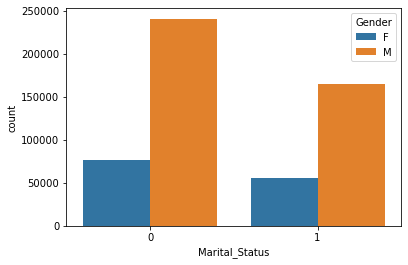

In [29]:
sns.countplot(data=data,x='Marital_Status',hue='Gender')

# Analysis stay in current city and purchase

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

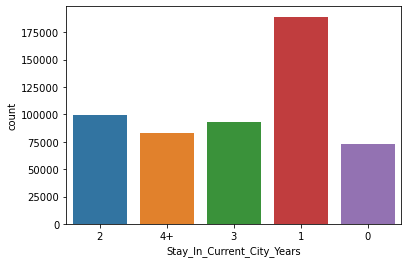

In [30]:
sns.countplot(data=data,x='Stay_In_Current_City_Years')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

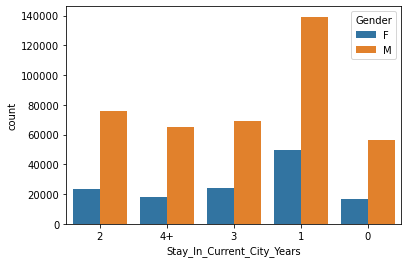

In [31]:
sns.countplot(data=data,x='Stay_In_Current_City_Years',hue='Gender')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

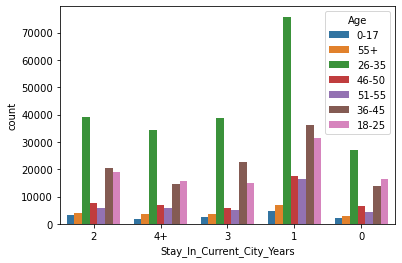

In [32]:
sns.countplot(data=data,x='Stay_In_Current_City_Years',hue='Age')

<AxesSubplot:ylabel='Purchase'>

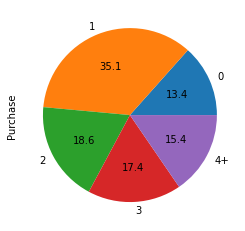

In [33]:
x=data.groupby('Stay_In_Current_City_Years').sum()['Purchase']
x.plot(kind='pie',autopct='%.1f')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

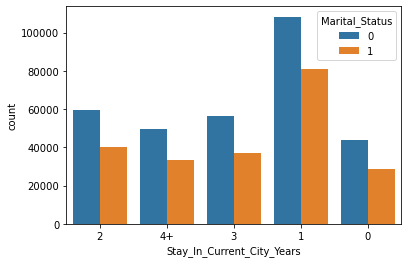

In [34]:
sns.countplot(data=data , x='Stay_In_Current_City_Years',hue='Marital_Status')

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

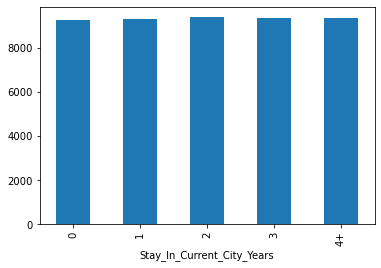

In [35]:
data.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind='bar')

# occupation and purchase analysis

<AxesSubplot:xlabel='Occupation', ylabel='count'>

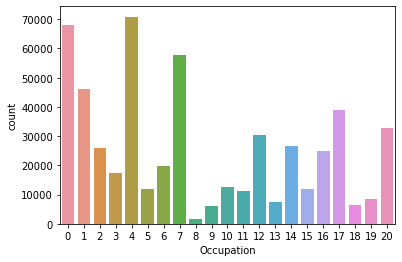

In [36]:
sns.countplot(data=data , x='Occupation')

<AxesSubplot:xlabel='Occupation'>

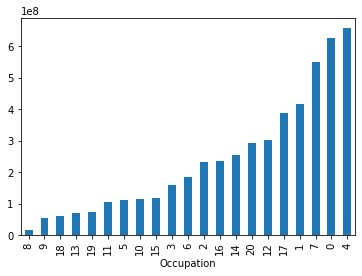

In [37]:
data.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

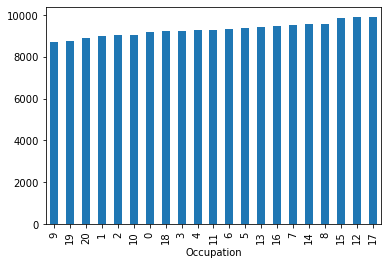

In [38]:
data.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

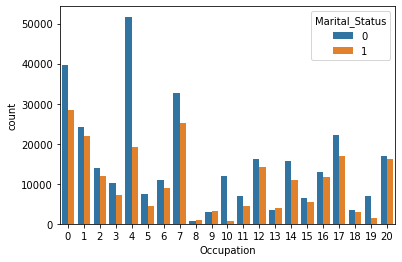

In [39]:
sns.countplot(data=data , x='Occupation',hue='Marital_Status')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

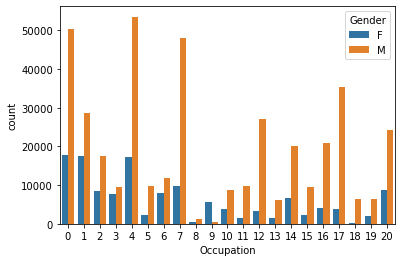

In [40]:
sns.countplot(data=data,x='Occupation',hue='Gender')

<AxesSubplot:xlabel='Occupation'>

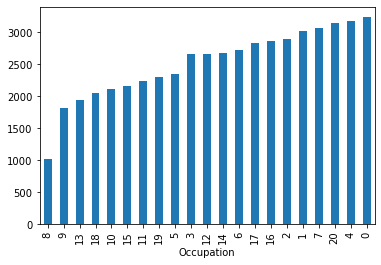

In [41]:
#unique products 
data.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_ID'>

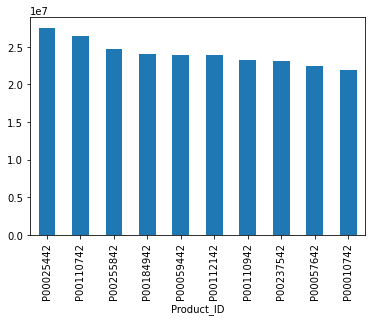

In [42]:
#people spent on more money top 10 products

data.groupby('Product_ID').sum()['Purchase'].sort_values().nlargest(10).plot(kind='bar')

<AxesSubplot:xlabel='Product_ID'>

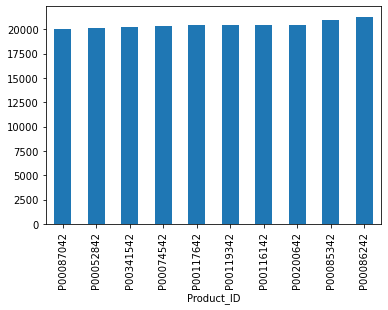

In [43]:
#highly expensive product
data.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_ID'>

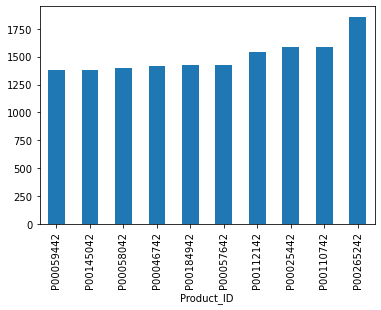

In [44]:
#top 10 highest products

data.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

# Analysis Gender and marital status with sale 

In [53]:
lst = []
for i in range(len(data)):
    x=data['Gender'][i]+"-"+str(data['Marital_Status'][i])
    lst.append(x)


In [59]:
data['Gender_Marital'] = lst

In [60]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,Gender_Marital
0,1000001,P00069042,F,0-17,10,A,2,0,8370,F-0
1,1000001,P00248942,F,0-17,10,A,2,0,15200,F-0
2,1000001,P00087842,F,0-17,10,A,2,0,1422,F-0
3,1000001,P00085442,F,0-17,10,A,2,0,1057,F-0
4,1000002,P00285442,M,55+,16,C,4+,0,7969,M-0
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,11664,M-0
537573,1004737,P00111142,M,36-45,16,C,1,0,19196,M-0
537574,1004737,P00345942,M,36-45,16,C,1,0,8043,M-0
537575,1004737,P00285842,M,36-45,16,C,1,0,7172,M-0


<AxesSubplot:xlabel='Gender_Marital', ylabel='count'>

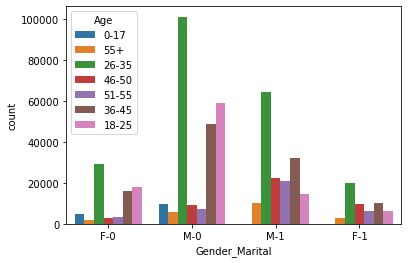

In [63]:
sns.countplot(data=data,x='Gender_Marital' , hue='Age')

<AxesSubplot:xlabel='Gender_Marital', ylabel='count'>

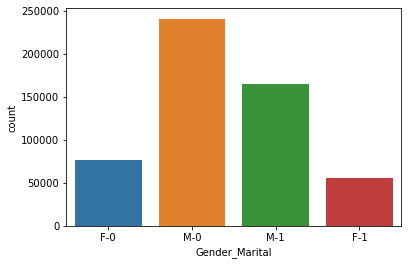

In [64]:
sns.countplot(data=data,x='Gender_Marital')

<AxesSubplot:ylabel='Purchase'>

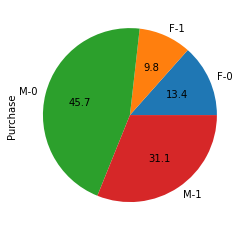

In [69]:
data.groupby('Gender_Marital').sum()['Purchase'].plot(kind='pie' , autopct='%0.1f')

<AxesSubplot:xlabel='Gender_Marital'>

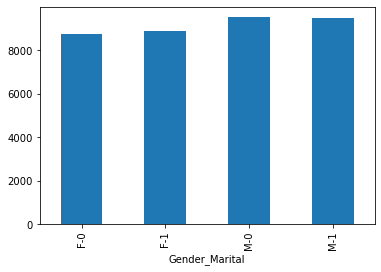

In [71]:
data.groupby('Gender_Marital').mean()['Purchase'].plot(kind='bar')

<AxesSubplot:xlabel='Gender_Marital'>

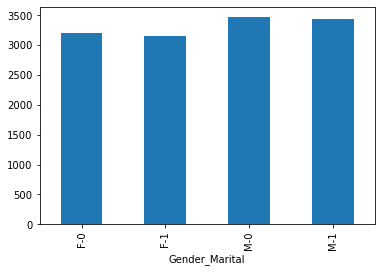

In [73]:
data.groupby('Gender_Marital').nunique()['Product_ID'].plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='count'>

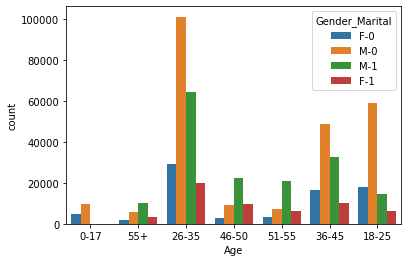

In [74]:
sns.countplot(data=data , x='Age',hue='Gender_Marital')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

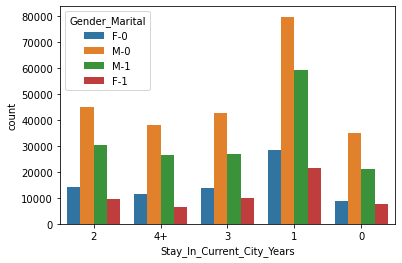

In [76]:
sns.countplot(data=data , x='Stay_In_Current_City_Years',hue='Gender_Marital')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

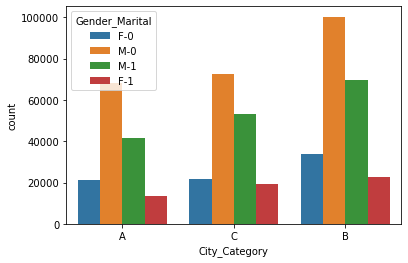

In [77]:
sns.countplot(data=data , x='City_Category',hue='Gender_Marital')